In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())

print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#One-Hot encode
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'Contract',
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

print(df.dtypes)


customerID                                object
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

In [11]:

df["TotalCharges"] = df["TotalCharges"].replace(' ', 0)
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [12]:

scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'tenure']])
#Scaling Numerical Data

Random Forest Model Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



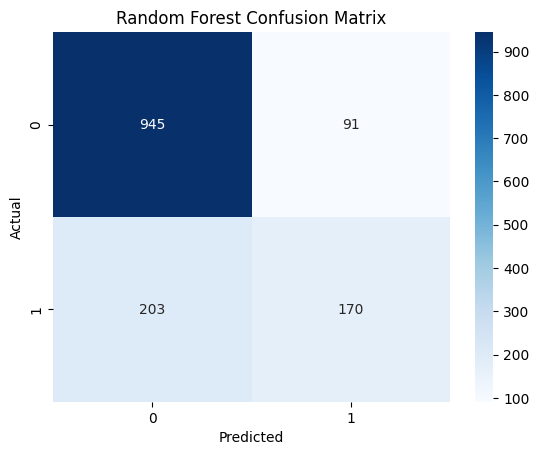

In [15]:

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

# Confusion matrix
"""
Helps visualize how well the model classifies customers into churn/no-churn categories.
"""

import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Feature Importance

Feature Importance:
TotalCharges                             0.190672
tenure                                   0.175232
MonthlyCharges                           0.171879
InternetService_Fiber optic              0.036494
PaymentMethod_Electronic check           0.035489
Contract_Two year                        0.030140
OnlineSecurity_Yes                       0.029785
gender_Male                              0.027448
PaperlessBilling_Yes                     0.025281
Partner_Yes                              0.024027
TechSupport_Yes                          0.023610
Contract_One year                        0.021975
OnlineBackup_Yes                         0.021624
Dependents_Yes                           0.021059
SeniorCitizen                            0.019993
MultipleLines_Yes                        0.019804
DeviceProtection_Yes                     0.018885
StreamingMovies_Yes                      0.018368
StreamingTV_Yes                          0.017263
PaymentMethod_Mailed check    

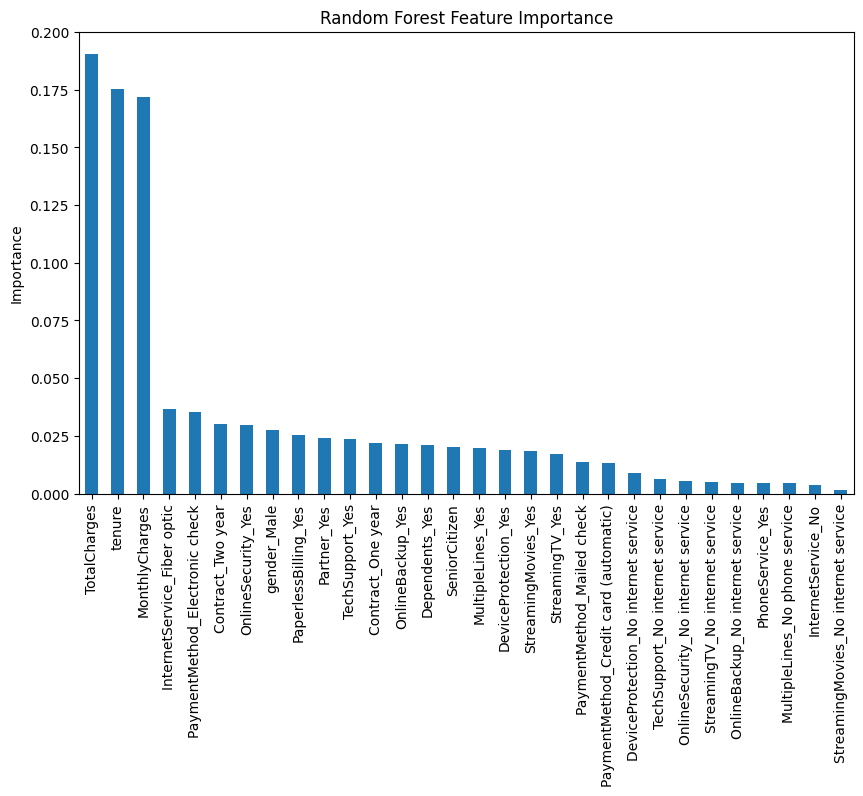

In [18]:
f_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(f_imp)

# Visualize feature importance
f_imp.plot(kind='bar', figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.ylabel('Importance')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

# Train with the best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [19]:
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.81      0.81      1409

